## Setup proejct

In [6]:
import os
project = input('input project name ')
directory = './' + project
try:
    if not os.path.exists(directory):
        os.makedirs(directory)
        os.makedirs(directory + '/data')
        print('project created :', project)
    else:
        print('project with the same name already exists :', project)
except OSError:
    print('Error : Creating directory', directory)

project with the same name already exists : test


## (option 1) Fetch several data from smiles.sd (omitted)

## (option 2) Fetch data from *.csv (omitted)
* need 'smiles.csv' with columns 'smiles, label'

## Encode molecules to latent space & fingerprints

In [7]:
from implements.encoder import encode_latent_fp

encode_latent_fp(project)

tensorflow backend


Using TensorFlow backend.
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packag

fetching data...
fetched smiles : 8


From C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\backend\tensorflow_backend.py:1210: calling reduce_prod (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\models.py:245: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '
From C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\backend\tensorflow_backend.py:1192: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
From C:\Users\PC\.conda\envs\01_chemvae\lib\site-packages\keras\backend\tensorflow_backend.py:1156: calling reduce_max (from tensorflow.python.ops.mat

Using standarized functions? True
Standarization: estimating mu and std values ...done!
canonizing smiles...
encoding mols to hot...
failed :  1
encoded smiles : 7
encoding mols...
failed: 0
encoded smiles : 7
encoding rdk fp...
[<rdkit.Chem.rdchem.Mol object at 0x0000022ACD953440>, <rdkit.Chem.rdchem.Mol object at 0x0000022AD8F53A80>, <rdkit.Chem.rdchem.Mol object at 0x0000022AD8F539E0>, <rdkit.Chem.rdchem.Mol object at 0x0000022AD8F53A30>, <rdkit.Chem.rdchem.Mol object at 0x0000022AD8F53B20>, <rdkit.Chem.rdchem.Mol object at 0x0000022AD8F53EE0>, <rdkit.Chem.rdchem.Mol object at 0x0000022AD8F53940>, <rdkit.Chem.rdchem.Mol object at 0x0000022AD8F53BC0>]
encoding pattern fp...
encoding layered fp...
encoding layered fp...


## Fetch external latent space & fingerprints (omitted)

## Check GPU

In [9]:
from tensorflow.python.client import device_lib
print(len(device_lib.list_local_devices()))
print(device_lib.list_local_devices())

1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16366250072481935461
]


##  tSNE & PCA

In [1]:
from implements.learner import learn_tsne_pca

learn_tsne_pca('test', gpu_available=False)

(5/5) fetching MACCSKeys fp group...
(10/10) training MACCSKeys fingerprint pca...

## Plot molecules

(10/10) fetching MACCSKeys fingerprint pca points...


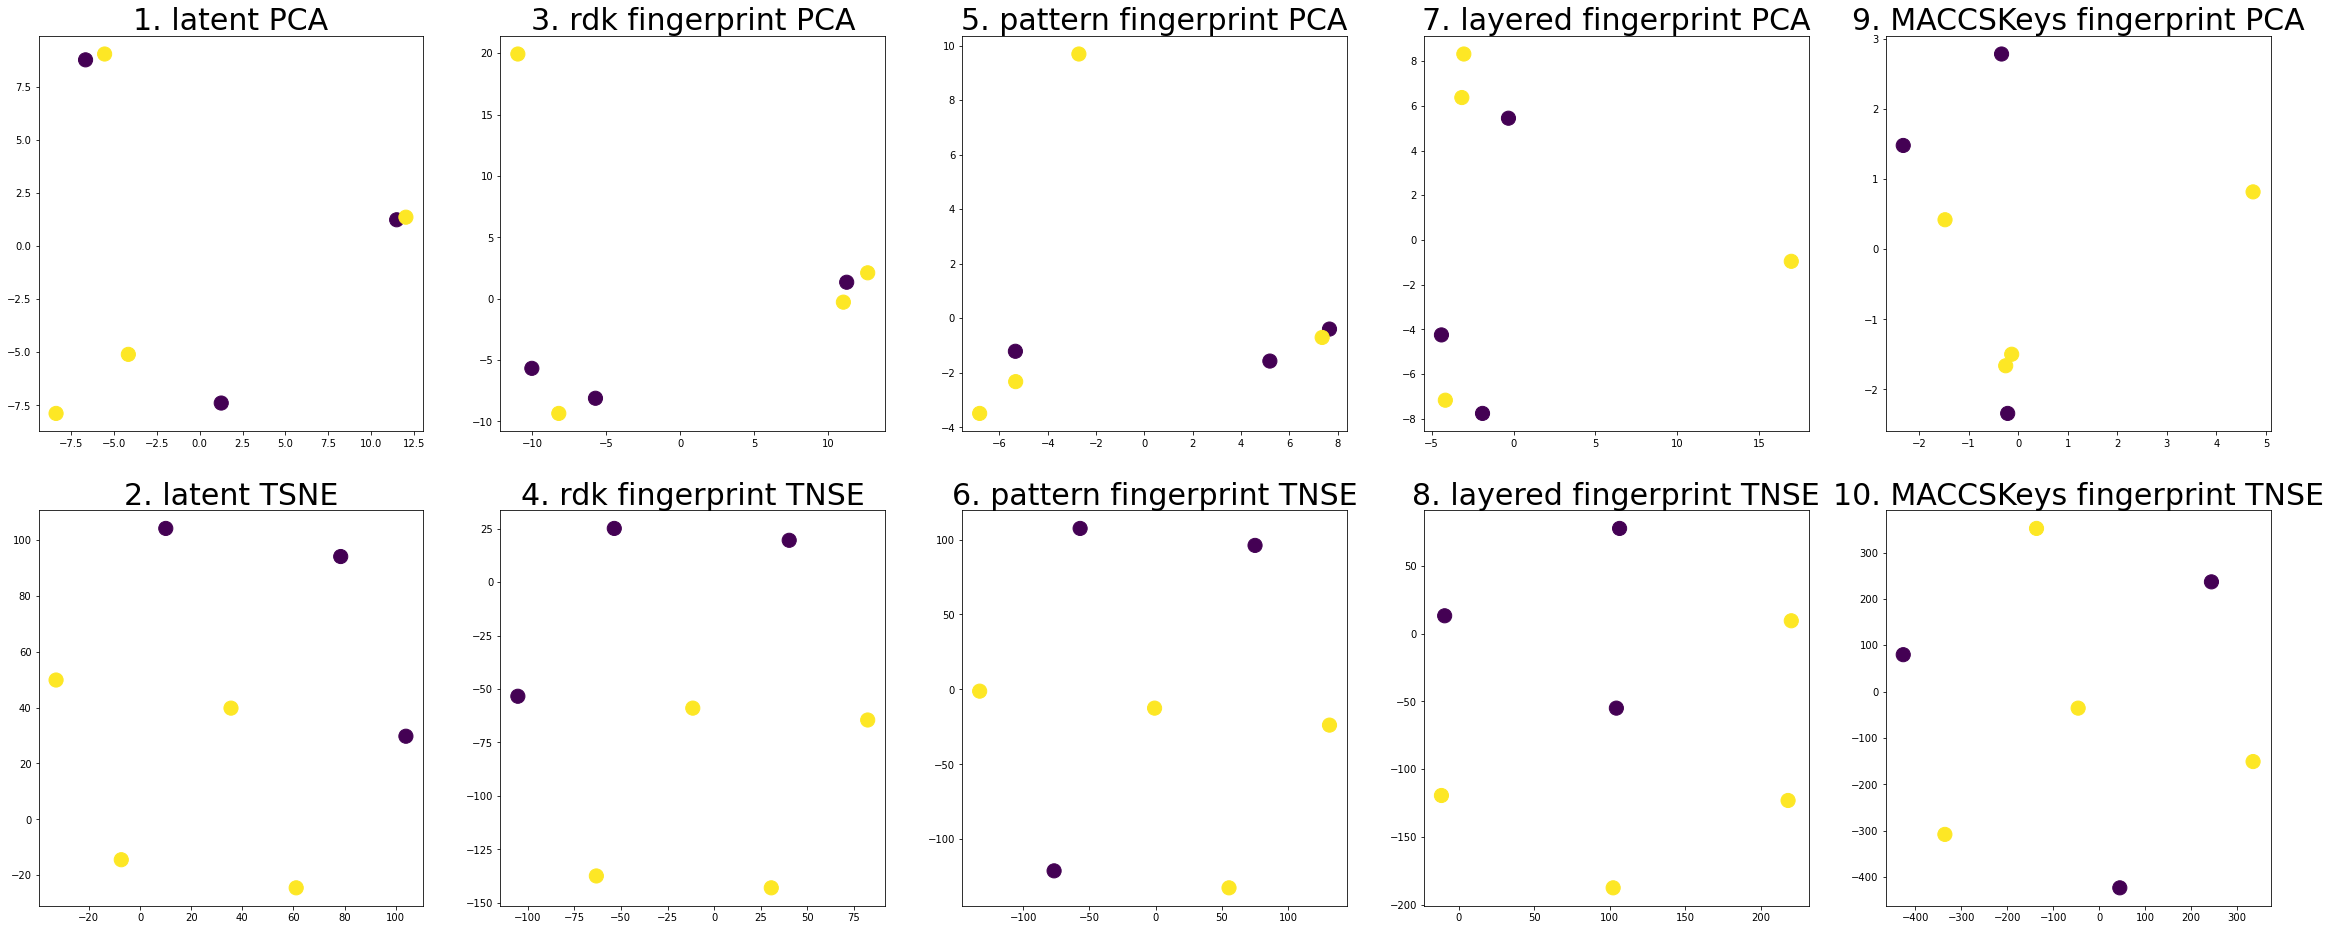

In [1]:
from implements.plotter import plot_molecules

plot_molecules('test', size=200, alpha=1)

## Select and cluster the molecules

fetching pattern_fp_pca points...


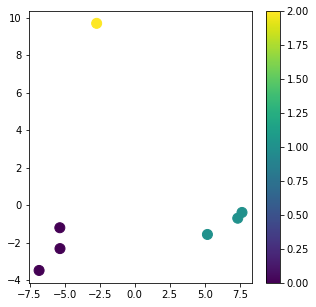

<< label 0 >>


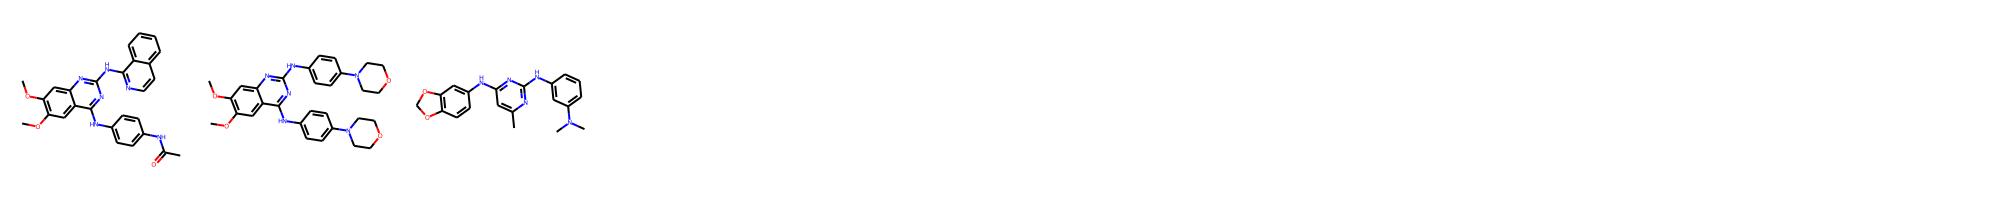

<< label 1 >>


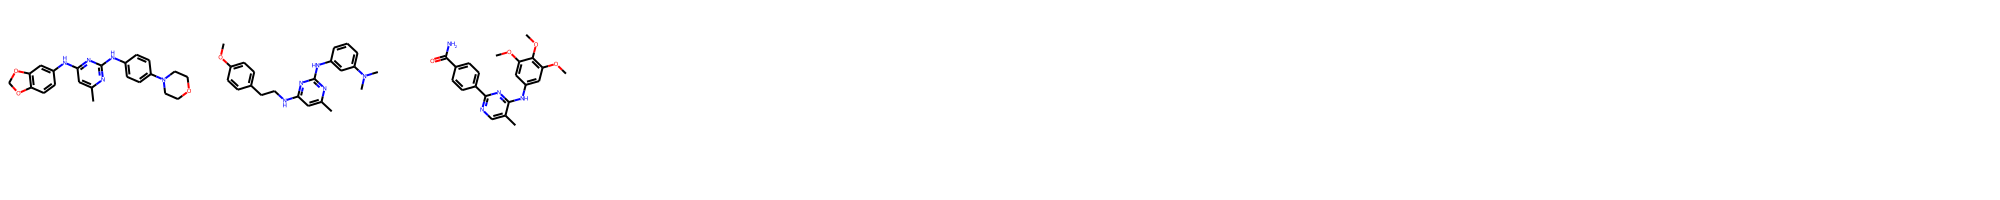

<< label 2 >>


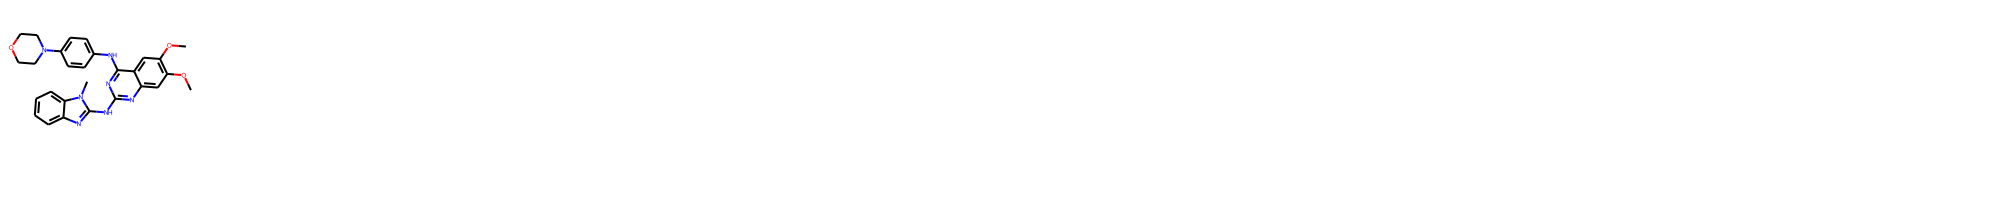

In [4]:
from implements.plotter import cluster

# sel = int(input('enter the graph to be clustered'))
# n_clusters = int(input('enter the number of group'))
clustered = cluster('test', 5, 3, size=100, alpha=1) # cluster, plot, display

## Export the molecules

In [5]:
from implements.plotter import export_molecules

sel = list(map(int, input('enter label numbers to export').split(' ')))
export_molecules('test', clustered, sel)

                                                   0
0  <img data-content="rdkit/molecule" src="data:i...
1  <img data-content="rdkit/molecule" src="data:i...
2  <img data-content="rdkit/molecule" src="data:i...
                                                   1
0  <img data-content="rdkit/molecule" src="data:i...
1  <img data-content="rdkit/molecule" src="data:i...
2  <img data-content="rdkit/molecule" src="data:i...
sel : [0, 1]
saving sd files...test/result.sd is saved!
